In [ ]:
"""i = []
while True:
  i.append(i)"""

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Cascade Cup/train_age_dataset.csv')
df_test = pd.read_csv('/content/drive/My Drive/Cascade Cup/test_age_dataset.csv')
#df_test = pd.read_csv('/content/drive/My Drive/Cascade Cup/test_age_dataset2.csv')

In [ ]:
df = pd.DataFrame(df)
df_test = pd.DataFrame(df_test)

In [ ]:
print(df.shape)
print(df_test.shape)

(488877, 27)
(54320, 26)


In [ ]:
df.age_group.value_counts()

1    308315
4     60803
3     60404
2     59355
Name: age_group, dtype: int64

In [ ]:
"""df1 = df[df['age_group']==1]
df = df[df.age_group != 1]
df1 = pd.DataFrame(df1)
df1 = df1.iloc[:200000,:]
df = df.append(df1, ignore_index=True)
df.age_group.value_counts()"""

1    200000
4     60803
3     60404
2     59355
Name: age_group, dtype: int64

In [ ]:
y = df.age_group
x = df.copy()
columns = ['Unnamed: 0','userId','age_group']
#columns = ['Unnamed: 0','userId']
x = x.drop(columns = columns)

In [ ]:
x.head()

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import utils

In [ ]:
"""from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
num_classes = np.max(y) + 1
y = utils.to_categorical(y, num_classes)"""

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)
x_train = x
y_train =y

In [ ]:
x_train1 = x_train.iloc[:100000,:]
x_train2 = x_train.iloc[100000:200000,:]
x_train3 = x_train.iloc[200000:300000,:]
x_train4 = x_train.iloc[300000:400000,:]
x_train5 = x_train.iloc[400000:,:]

y_train1 = y_train.iloc[:100000]
y_train2 = y_train.iloc[100000:200000]
y_train3 = y_train.iloc[200000:300000]
y_train4 = y_train.iloc[300000:400000]
y_train5 = y_train.iloc[400000:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.layers.embeddings import Embedding 

In [ ]:
batch_size = 512
epochs = 100

# Build the model
model = Sequential()
model.add(Dense(512))
model.add(Activation('tanh'))
#model.add(Dense(512))
#model.add(Activation('tanh'))
#model.add(LSTM(512))
#model.add(Dropout(0.5))
#model.add(Dense(512))
#model.add(Activation('tanh'))
#model.add(Dropout(0.5))
#model.add(Dense(512))
#model.add(Activation('sigmoid'))
#model.add(Dense(512))
#model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

In [ ]:
"""    GRADIENT BOOSTING    """

# Fitting Gradient Boosting classifier to the training set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators = 2000, learning_rate = 1.0, max_depth=4, max_leaf_nodes=4, random_state=42)
classifier.fit(x_train, y_train)


In [ ]:
# feature importance
#feature_imp = classifier.feature_importances_
fea_imp = pd.Series(classifier.feature_importances_,x_train.columns)
fea_imp

In [ ]:
"""KNN"""
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

In [ ]:
!pip install pytorch-tabnet

In [ ]:

import torch
from pytorch_tabnet.tab_model import TabNetClassifier
classifier = TabNetClassifier()
classifier.fit(x_train,y_train)

In [ ]:

import torch
from pytorch_tabnet.tab_model import TabNetClassifier
classifier = TabNetClassifier()
classifier.fit(x_train,y_train,
              weights=1,
              max_epochs=10,patience=7, 
              batch_size=2048, virtual_batch_size=512,
              num_workers=0,drop_last=False)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
classifier.fit(x_train, y_train)

In [ ]:
y_train.shape

(488877,)

In [ ]:
#Fitting Random Forest Classification to the training Set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 3000 , criterion = 'entropy', random_state = 42, max_depth=100, max_features=6, min_samples_split=10, min_samples_leaf=5)
classifier.fit(x_train1 , y_train1)
classifier.fit(x_train2 , y_train2)
classifier.fit(x_train3 , y_train3)
classifier.fit(x_train4 , y_train4)
classifier.fit(x_train5 , y_train5)

In [ ]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier(n_estimators = 5000, learning_rate=1 , criterion = 'entropy', random_state = 42, max_depth=5, max_features=5, min_samples_split=5, min_samples_leaf=5)
classifier.fit(x_train1 , y_train1)
classifier.fit(x_train2 , y_train2)
classifier.fit(x_train3 , y_train3)
classifier.fit(x_train4 , y_train4)
classifier.fit(x_train5 , y_train5)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               criterion='entropy', importance_type='split', learning_rate=1,
               max_depth=5, max_features=5, min_child_samples=20,
               min_child_weight=0.001, min_samples_leaf=5, min_samples_split=5,
               min_split_gain=0.0, n_estimators=5000, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

Text(0, 0.5, 'Accuracy')

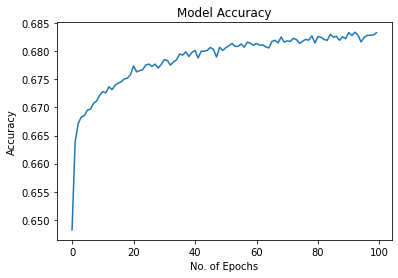

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

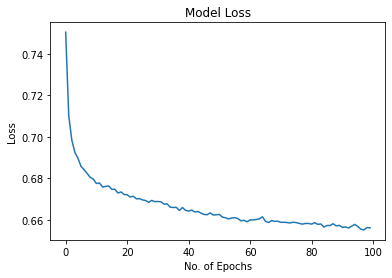

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

In [ ]:
y_pred = model.predict_classes(x_test)
#y_pred = np.argmax(model.predict(x_test), axis=-1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.head(5)

In [ ]:
y_pred.value_counts()

In [ ]:
print(accuracy_score(y_pred, y_test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
x_test1 = df_test.copy()
columns = ['Unnamed: 0','userId']
#columns = ['Unnamed: 0','userId','Unnamed: 27']
x_test1 = x_test1.drop(columns = columns)
#Feature Scaling
sc = StandardScaler()
x_test1 = sc.fit_transform(x_test1)
x_test1 = pd.DataFrame(x_test1)

In [ ]:
x_test1.head()

In [ ]:
x_test.head()

In [ ]:
#y_pred1 = model.predict_classes(x_test1)
y_pred1 = classifier.predict(x_test1)
y_pred1 = pd.DataFrame(y_pred1)


In [ ]:
res = pd.DataFrame(y_pred1)
res.columns = ["prediction"]
res.to_csv("18.csv")

In [ ]:
y_pred1.value_counts()

prediction
1             40152
2              7258
4              4322
3              2588
dtype: int64